In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

east london za
albany au
hithadhoo mv
makakilo city us
busselton au
saldanha za
rikitea pf
banda aceh id
taolanaro mg
millbrook ca
ostrovnoy ru
cosala mx
te anau nz
new norfolk au
vaitupu wf
yellowknife ca
ushuaia ar
salalah om
bathsheba bb
shubarshi kz
rikitea pf
thompson ca
rikitea pf
dwarka in
taolanaro mg
busselton au
matay eg
port alfred za
kashi cn
ushuaia ar
sentyabrskiy ru
filadelfia py
bambous virieux mu
taunsa pk
avera pf
punta arenas cl
khonuu ru
hithadhoo mv
moissala td
sinop tr
samusu ws
hobart au
georgetown sh
narsaq gl
rikitea pf
puerto escondido mx
labuhan id
albany au
puerto leguizamo co
hilo us
yellowknife ca
mapiripan co
samarai pg
erenhot cn
punta arenas cl
seoul kr
barrow us
yar-sale ru
puerto ayora ec
nador ma
devils lake us
mount isa au
albany au
vaini to
katherine au
tanete id
muros es
quipile co
ilulissat gl
hilo us
jamestown sh
mys shmidta ru
richards bay za
nouadhibou mr
esperance au
cayenne gf
tuggurt dz
sambava mg
komsomolskiy ru
leningradskiy ru
berdigesty

rabo de peixe pt
aquin ht
puerto ayora ec
brae gb
okha ru
tafresh ir
leh in
berlevag no
saint-philippe re
taoudenni ml
anadyr ru
jamestown sh
daru pg
novikovo ru
vaini to
fevralsk ru
taolanaro mg
butaritari ki
busselton au
amderma ru
colonelganj in
miranda br
coihaique cl
dupnica bg
punta arenas cl
kaitangata nz
madang pg
taolanaro mg
hilo us
lethem gy
attawapiskat ca
pevek ru
dingle ie
vaini to
albany au
ushuaia ar
nome us
beloha mg
olinda br
rikitea pf
rikitea pf
nizhneyansk ru
litoral del san juan co
atuona pf
dikson ru
saint-philippe re
aktau kz
bluff nz
petrolandia br
mys shmidta ru
santa rosa ar
mount isa au
georgetown sh
ushuaia ar
belushya guba ru
yanan cn
arlit ne
shaki ng
hobart au
thompson ca
yulara au
taolanaro mg
kashan ir
padang id
khatanga ru
tiksi ru
busselton au
nadym ru
leningradskiy ru
saldanha za
khatanga ru
mahadday weyne so
puerto ayora ec
saldanha za
oranjemund na
vaini to
college us
punta arenas cl
cape town za
ushuaia ar
kodiak us
rio verde de mato grosso br
ri

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d496981f3ab4ab4fbc15adae63ab96


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | makakilo city
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | banda aceh
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | millbrook
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | cosala
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | bathsheba
Processing Record 20 of Set 1 | shubarshi
Processing Record 21 of Set 1 | thompson
Processing Record 

Processing Record 36 of Set 4 | constitucion
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | rorvik
Processing Record 39 of Set 4 | haines junction
Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | sebrovo
Processing Record 42 of Set 4 | teya
Processing Record 43 of Set 4 | chabua
Processing Record 44 of Set 4 | papasquiaro
City not found. Skipping...
Processing Record 45 of Set 4 | beringovskiy
Processing Record 46 of Set 4 | santa isabel
Processing Record 47 of Set 4 | miguel hidalgo
Processing Record 48 of Set 4 | mopipi
Processing Record 49 of Set 4 | auki
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | la tuque
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | flagstaff
Processing Record 4 of Set 5 | abalak
Processing Record 5 of Set 5 | okhotsk
Processing Record 6 of Set 5 | opuwo
Processing Record 7 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 8 of Set

Processing Record 29 of Set 8 | umm kaddadah
Processing Record 30 of Set 8 | nioro
Processing Record 31 of Set 8 | coahuayana
Processing Record 32 of Set 8 | novoraychikhinsk
Processing Record 33 of Set 8 | gamba
Processing Record 34 of Set 8 | rockport
Processing Record 35 of Set 8 | aklavik
Processing Record 36 of Set 8 | kizilskoye
Processing Record 37 of Set 8 | rio grande
Processing Record 38 of Set 8 | basoko
Processing Record 39 of Set 8 | harper
Processing Record 40 of Set 8 | temiscaming
Processing Record 41 of Set 8 | krasnovishersk
Processing Record 42 of Set 8 | lusaka
Processing Record 43 of Set 8 | camacha
Processing Record 44 of Set 8 | rabo de peixe
Processing Record 45 of Set 8 | aquin
Processing Record 46 of Set 8 | brae
Processing Record 47 of Set 8 | okha
Processing Record 48 of Set 8 | tafresh
Processing Record 49 of Set 8 | leh
Processing Record 50 of Set 8 | taoudenni
Processing Record 1 of Set 9 | daru
Processing Record 2 of Set 9 | novikovo
Processing Record 3 

Processing Record 16 of Set 12 | hervey bay
Processing Record 17 of Set 12 | portland
Processing Record 18 of Set 12 | shubarkuduk
Processing Record 19 of Set 12 | tabuleiro do norte
Processing Record 20 of Set 12 | hokitika
Processing Record 21 of Set 12 | boras
Processing Record 22 of Set 12 | puerto madryn
Processing Record 23 of Set 12 | haibowan
City not found. Skipping...
Processing Record 24 of Set 12 | natal
Processing Record 25 of Set 12 | chor
Processing Record 26 of Set 12 | hovd
Processing Record 27 of Set 12 | soyo
Processing Record 28 of Set 12 | green river
Processing Record 29 of Set 12 | beamsville
Processing Record 30 of Set 12 | bukachacha
Processing Record 31 of Set 12 | mamakan
Processing Record 32 of Set 12 | atar
Processing Record 33 of Set 12 | deleni
Processing Record 34 of Set 12 | mwinilunga
Processing Record 35 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 36 of Set 12 | cuamba
Processing Record 37 of Set 12 | gaya
Processing Record 38 o

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,60.04,88,100,18.01,ZA,2021-09-29 19:29:07
1,Albany,42.6001,-73.9662,63.09,57,82,9.10,US,2021-09-29 19:24:58
2,Hithadhoo,-0.6000,73.0833,82.27,74,100,3.98,MV,2021-09-29 19:29:08
3,Makakilo City,21.3469,-158.0858,82.72,65,1,9.22,US,2021-09-29 19:27:45
4,Busselton,-33.6500,115.3333,56.08,86,11,7.14,AU,2021-09-29 19:29:08
5,Saldanha,-33.0117,17.9442,62.65,72,29,16.60,ZA,2021-09-29 19:25:10
6,Rikitea,-23.1203,-134.9692,73.04,68,100,17.81,PF,2021-09-29 19:29:09
7,Banda Aceh,5.5577,95.3222,78.46,83,98,6.20,ID,2021-09-29 19:29:09
8,Millbrook,32.4799,-86.3619,87.87,58,90,0.00,US,2021-09-29 19:29:10
9,Ostrovnoy,68.0531,39.5131,44.46,90,57,9.44,RU,2021-09-29 19:29:11


In [10]:
city_data_df = city_data_df[['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-09-29 19:29:07,-33.0153,27.9116,60.04,88,100,18.01
1,Albany,US,2021-09-29 19:24:58,42.6001,-73.9662,63.09,57,82,9.10
2,Hithadhoo,MV,2021-09-29 19:29:08,-0.6000,73.0833,82.27,74,100,3.98
3,Makakilo City,US,2021-09-29 19:27:45,21.3469,-158.0858,82.72,65,1,9.22
4,Busselton,AU,2021-09-29 19:29:08,-33.6500,115.3333,56.08,86,11,7.14
5,Saldanha,ZA,2021-09-29 19:25:10,-33.0117,17.9442,62.65,72,29,16.60
6,Rikitea,PF,2021-09-29 19:29:09,-23.1203,-134.9692,73.04,68,100,17.81
7,Banda Aceh,ID,2021-09-29 19:29:09,5.5577,95.3222,78.46,83,98,6.20
8,Millbrook,US,2021-09-29 19:29:10,32.4799,-86.3619,87.87,58,90,0.00
9,Ostrovnoy,RU,2021-09-29 19:29:11,68.0531,39.5131,44.46,90,57,9.44


In [11]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

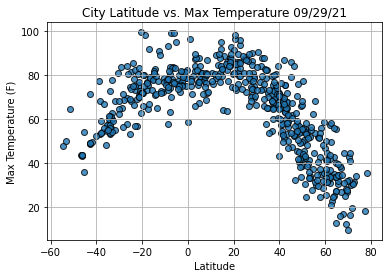

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

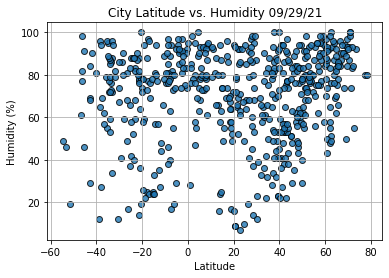

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

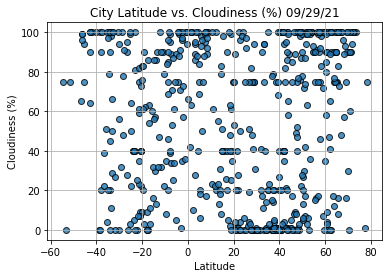

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

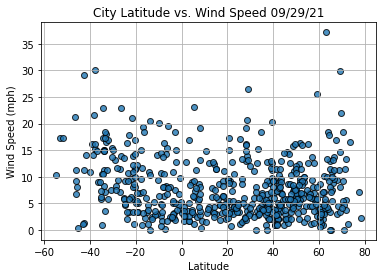

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2021-09-29 19:26:53
Lat                        62.456
Lng                     -114.3525
Max Temp                    49.41
Humidity                      100
Cloudiness                     90
Wind Speed                   3.44
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
554     True
555    False
556     True
557     True
558    False
Name: Lat, Length: 559, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2021-09-29 19:24:58,42.6001,-73.9662,63.09,57,82,9.10
3,Makakilo City,US,2021-09-29 19:27:45,21.3469,-158.0858,82.72,65,1,9.22
7,Banda Aceh,ID,2021-09-29 19:29:09,5.5577,95.3222,78.46,83,98,6.20
8,Millbrook,US,2021-09-29 19:29:10,32.4799,-86.3619,87.87,58,90,0.00
9,Ostrovnoy,RU,2021-09-29 19:29:11,68.0531,39.5131,44.46,90,57,9.44


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

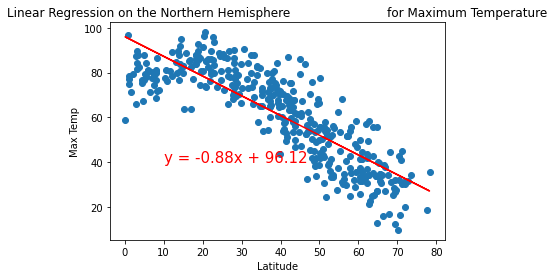

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

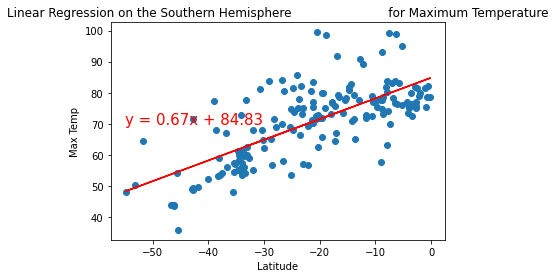

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,70))

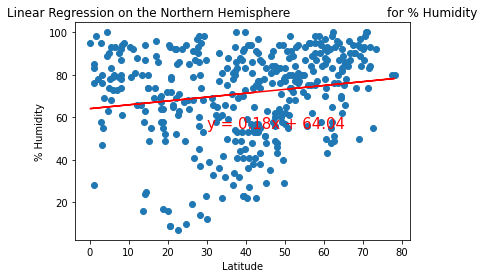

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(30,55))

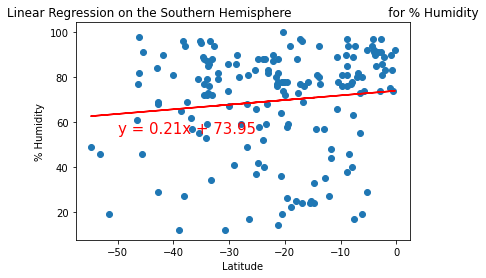

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,55))

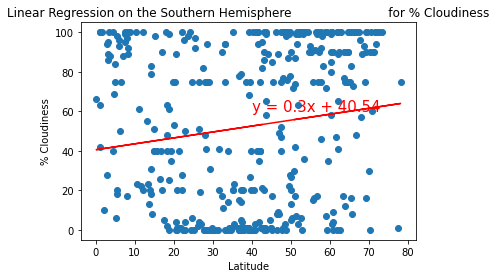

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

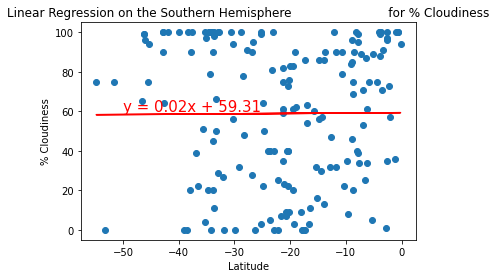

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

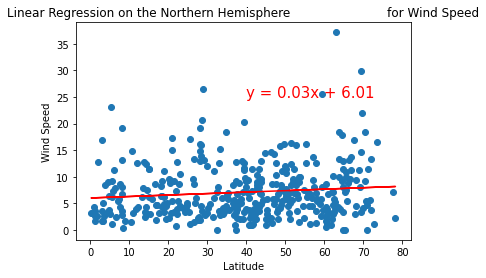

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

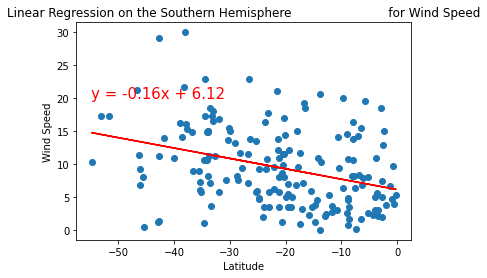

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))